<a href="https://colab.research.google.com/github/davrodrod/algorirmosIA/blob/master/KVecinosCercanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente de información:  https://nbviewer.jupyter.org/github/cs109/content/blob/master/labs/lab5/Lab5.ipynb


Fuente de Datos: https://github.com/datasciencelabs/data/blob/master/olive.csv

In [8]:
import pandas as pd

urldatos = "https://raw.githubusercontent.com/datasciencelabs/data/master/olive.csv"
df = pd.read_csv(urldatos)

df.rename(columns={df.columns[0]:'areastring'}, inplace=True)

acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

# Esto divide todos los valores asociados a los ácidos por 100
dfsub = df[acidlist].apply(lambda x: x/100.0)
df[acidlist]=dfsub
df.head(5)

,areastring,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
1,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
2,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
3,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
4,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
5,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [11]:
dfsouth = df[df.Region==1]
dfsouthns = dfsouth[df.Area != 4]
dfsouthns.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,areastring,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
1,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
2,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
3,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
4,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
5,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


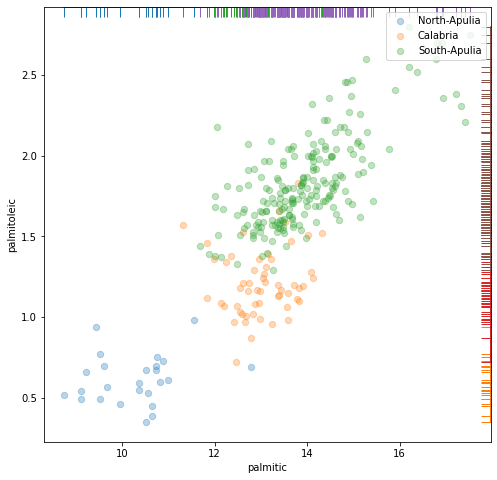

In [21]:
import random
import copy
import matplotlib.pyplot as plt 
import numpy as np  

from matplotlib import rcParams

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, labeler={}, mfunc=None, setupfunc=None, mms=8):
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        axes.scatter(x, y, cmap=colorscale)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            axes.scatter(x, y, color=None, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=None, mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

akeys=[1,2,3]
avals=['North-Apulia','Calabria','South-Apulia']
amap={e[0]:e[1] for e in zip(akeys,avals)}
ax=scatter_by(dfsouthns, 'palmitic', 'palmitoleic', by='Area', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

In [0]:
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print("SCORE", clf.score(Xte, yte))
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [0]:
# Preparación de los datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

subdf=dfsouthns[['palmitic','palmitoleic']]
subdfstd=(subdf - subdf.mean())/subdf.std()   # Esto normaliza los valores
X=subdfstd.values
y=dfsouthns['Area'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

SCORE 0.9826086956521739
Datos de entrada:  [[-2.4284759  -2.42061876]
 [-0.43203553 -0.25370243]
 [ 2.74979131  1.26103521]
 [ 0.46913547  0.62989453]
 [ 0.26117293 -0.90588113]]


array([1, 3, 3, 3, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2,
       3, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 1, 3])

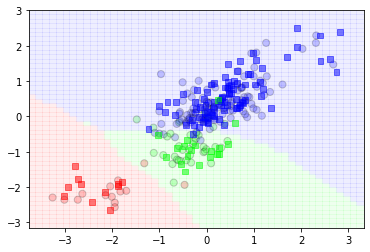

In [41]:
# Aquí se aplica el algoritmo. Se hace KNN con 20 vecinos

clf = KNeighborsClassifier(20).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

# Lo anterior pinta, la forma de utilizarlo sería así:
yPrediccion=clf.predict(Xtest)

print("Datos de entrada: ", Xtest[:5])
yPrediccion

(172,) (57,) (58,)
0.7068965517241379


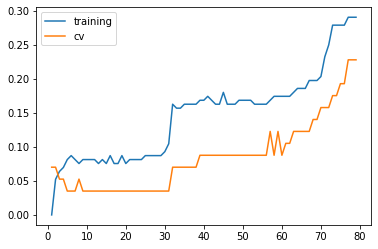

In [49]:
# Se pintan las gŕaficas de error
Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest, train_size=0.5)
print(ytrain.shape, ycv.shape, yte.shape)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print(clf.score(Xte, yte))